So my goal is to compare hurricane quantity to heat index:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store DataFrames
dfs = {}

# List of CSV file names (update paths as needed)
csv_files = {
    "Acadia NP": "Acadia NP Mapping Conversion.csv",
    "Cape Hatteras NS": "Cape Hatteras Mapping Conversion.csv",
    "Kenai Fjords NP": "Kenai Fjords NP Mapping Conversion.csv",
    "Olympic NP": "Olympic NP Mapping Conversion.csv",
    "Padre Island NS": "Padre Island Mapping Conversion.csv"
}

# Load each CSV into a Pandas DataFrame
for name, file in csv_files.items():
    dfs[name] = pd.read_csv(file)

# Example: Display the first few rows of one DataFrame
print(dfs["Acadia NP"].head())


   Year  Wind speed^2
0  1995           0.0
1  1996           0.0
2  1997           0.0
3  1998           0.0
4  1999           1.0


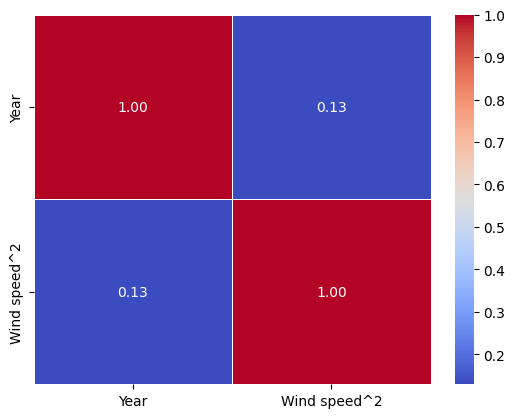

In [2]:
# I think this line creates a correlation matrix with the columns of the data? pandas function?
acandia_corr_matrix = dfs["Acadia NP"].corr()

# The below line sets the size
#       plt.figure(figsize=(8, 6))

# This line creates a plot (in matplotlib?) with the heatmap given the correlation matrix?
sns.heatmap(acandia_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
#plt.title("Correlation Heatmap")
plt.show()

In [3]:

# Initialize an empty DataFrame for merging

dfs["Acadia NP"].rename(columns={"Wind speed^2": "Acadia Speed^2"}, inplace=True)
dfs["Cape Hatteras NS"].rename(columns={"Wind speed^2": "Cape Speed^2"}, inplace=True)
dfs["Kenai Fjords NP"].rename(columns={"Wind speed^2": "Kenai Speed^2"}, inplace=True)
dfs["Olympic NP"].rename(columns={"Wind speed^2": "Olympic Speed^2"}, inplace=True)
dfs["Padre Island NS"].rename(columns={"Wind speed^2": "Padre Speed^2"}, inplace=True)


merged_df = dfs["Acadia NP"]

merged_df = pd.merge(merged_df, dfs["Cape Hatteras NS"], on="Year")  # Merge on Year
merged_df = pd.merge(merged_df, dfs["Kenai Fjords NP"], on="Year")  # Merge on Year
merged_df = pd.merge(merged_df, dfs["Olympic NP"], on="Year")  # Merge on Year
merged_df = pd.merge(merged_df, dfs["Padre Island NS"], on="Year")  # Merge on Year
print(merged_df.head())


   Year  Acadia Speed^2  Cape Speed^2  Kenai Speed^2  Olympic Speed^2  \
0  1995             0.0             0            0.0              0.0   
1  1996             0.0          5472            0.0              0.0   
2  1996             0.0          1521            0.0              0.0   
3  1996             0.0             0            0.0              0.0   
4  1997             0.0          1521            0.0              0.0   

   Padre Speed^2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


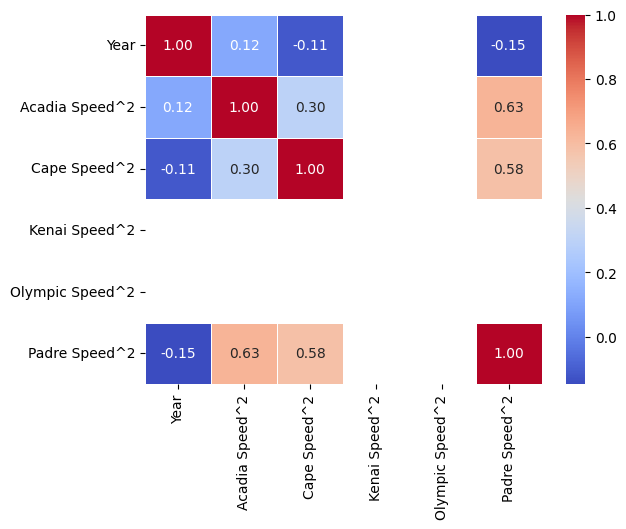

In [4]:
# Correlate:
merged_df_mat = merged_df.corr()

# The below line sets the size
#       plt.figure(figsize=(8, 6))

# This line creates a plot (in matplotlib?) with the heatmap given the correlation matrix?
sns.heatmap(merged_df_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
#plt.title("Correlation Heatmap")
plt.show()




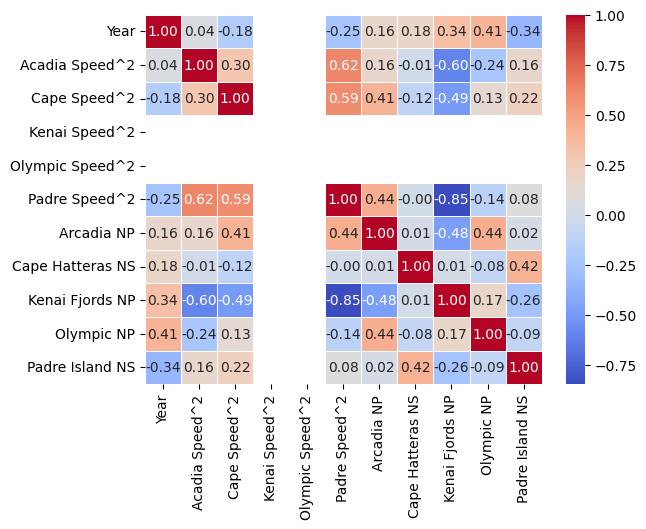

In [9]:
andrew_df = pd.read_csv("Parks Temperature Data.csv")

#print(andrew_df)

full_merged_df = pd.merge(merged_df, andrew_df, on="Year")  # Merge on Year

#?print(full_merged_df.head())


#full_merged_df = full_merged_df.dropna()
full_merged_df_mat = full_merged_df.corr()

# This line creates a plot (in matplotlib?) with the heatmap given the correlation matrix?
sns.heatmap(full_merged_df_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Show the plot
#plt.title("Correlation Heatmap")
plt.show()


In [6]:
import numpy as np
pts = np.array([[2, 4], [3, 2], [5, 1], [6, 0]])
# formatting looks like:
# [[2, 4], 
#  [3, 2], 
#  [5, 1], 
#  [6, 0]]
# [temp, hurricanes]

temp_line = pts[:,0]
windspeed_line = pts[:,1]

# Note that we are solving for:
# y = A x
# y_values = [t_values, 1] [x_variable, best_constant]
# Solve for x_variable, best_constant
# 

# Ended up having 1s second
A_line = np.array([temp_line , temp_line ** 0]).T

$${\bf A}^T {\bf A}{\bf x} = {\bf A}^T {\bf y}  $$

[-0.9   5.35]


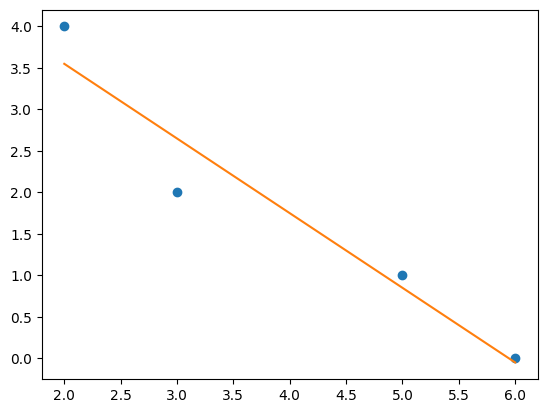

In [7]:
import numpy.linalg as la
x_sol = la.solve(A_line.T @ A_line, A_line.T @ windspeed_line)
print(x_sol)

plt.plot(temp_line, windspeed_line, 'o')
plt.plot(temp_line, temp_line * x_sol[0] + x_sol[1])